In [1]:
import numpy as np

## Question 6.a

In [2]:
def birthday(n):
    # Create n birthdays
    birthdays = np.random.randint(low=1, high=365+1, size=n)
    
    # Check if any matching pairs found
    seen_before = set()
    for bday in birthdays:
        if bday in seen_before:
            return 1
        seen_before.add(bday)
    return 0

## Question 6.b

In [3]:
num_runs = 1000
min_n = 2
max_n = 60

In [4]:
# Setup indices so there is only 1 simple indexing scheme
# A[n], X[n] correspond to n birthdays (can ignore index 0 and 1, since we are only looking at n >= 2)
A = np.zeros((max_n + 1, num_runs))
X = np.zeros((max_n + 1))
for n in range(min_n, max_n + 1):
    for i in range(num_runs):
        A[n, i] = birthday(n)
    X[n] = 1./num_runs * np.sum(A[n])

## Question 6.c

In [5]:
# Setup indices so there is only 1 simple indexing scheme
# A[n], X[n] correspond to n birthdays (can ignore index 0 and 1, since we are only looking at n >= 2)
Y = np.zeros((max_n + 1))
for n in range(min_n, max_n + 1):
    subtraction_term = 1
    for i in range(n):
        subtraction_term *= (365-i)/365
    Y[n] = 1 - subtraction_term

# Dynamic programming implementation, but was not noticeably faster and was less clear
# Y = np.zeros((max_n + 1))
# Y[min_n] = 1 - 365 * 364 / 365**2
# for n in range(min_n + 1, max_n + 1):
#     Y[n] = 1 - (1 - Y[n-1]) * (365 - (n-1)) / 365

## Question 6.c

In /home/tylerlum/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/tylerlum/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/tylerlum/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/tylerlum/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/tylerlum/.local/lib/python3.6/site-packages/matplotlib/

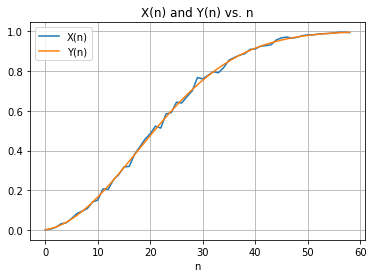

In [6]:
import matplotlib.pyplot as plt
plt.plot(np.arange(len(X[2:])), X[2:], label='X(n)')
plt.plot(np.arange(len(Y[2:])), Y[2:], label='Y(n)')
plt.xlabel('n')
plt.title('X(n) and Y(n) vs. n')
plt.grid()
plt.legend()